In [ ]:
%tensorflow_version 1.x
import tensorflow as tf
import numpy as np
import pandas as pd
import cv2
from keras import layers
import tensorflow
from keras.models import Model
from keras.preprocessing import sequence, image
from keras import layers
from keras.optimizers import Adam
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
import os
#import keras
from keras.callbacks import Callback
from keras.models import Sequential
import keras
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt

TensorFlow 1.x selected.


Using TensorFlow backend.


In [ ]:
model= keras.models.load_model('/content/drive/My Drive/BE project/model training history/7/vgg16_2_model.hdf5')






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 96, 96, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 96, 96, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 96, 96, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 48, 48, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 48, 48, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 48, 48, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 24, 24, 128)       0   

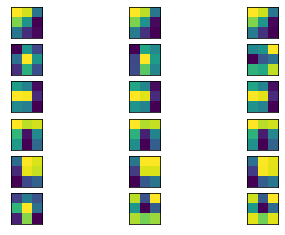

In [ ]:
filters, biases = model.layers[1].get_weights()
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
# plot first few filters
n_filters, ix = 6, 1
for i in range(n_filters):
	# get the filter
	f = filters[:, :, :, i]
	# plot each channel separately
	for j in range(3):
		# specify subplot and turn of axis
		ax = plt.subplot(n_filters, 3, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		plt.imshow(f[:, :, j])
		ix += 1
# show the figure
plt.show()

In [ ]:
#https://machinelearningmastery.com/how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks/

In [ ]:
import cv2

img = cv2.imread('/content/1be50d22d592470c28e022cfb802973fecbe9969.tif')
img=cv2.cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_to_visualize = img/255.

img_to_visualize = np.expand_dims(img_to_visualize, axis=0)


In [ ]:
from keras import backend as K
def layer_to_visualize(layer):
    inputs = [K.learning_phase()] + model.inputs

    _convout1_f = K.function(inputs, [layer.output])
    def convout1_f(X):
        # The [0] is to disable the training phase flag
        return _convout1_f([0] + [X])

    convolutions = convout1_f(img_to_visualize)
    convolutions = np.squeeze(convolutions)

    print ('Shape of conv:', convolutions.shape)
    
    n = convolutions.shape[0]
    n = int(np.ceil(np.sqrt(n)))
    
    # Visualization of each filter of the layer
    fig = plt.figure(figsize=(10,10))
    
    for i in range(len(convolutions)):
        ax = fig.add_subplot(n,n,i+1)
        ax.imshow(convolutions[i])
    
    
    #ax = fig.add_subplot(n,n,i+1)
    #ax.imshow(convolutions[i])

Shape of conv: (48, 48, 128)


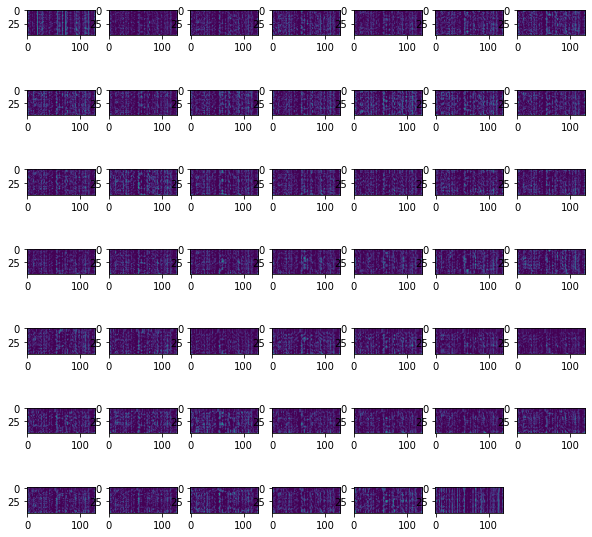

In [ ]:
layer_to_visualize(model.layers[4])

In [ ]:
for i in range(0,130):
  print (i)
  print (model.layers[i])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37


IndexError: ignored

In [ ]:
#https://github.com/yashk2810/Visualization-of-Convolutional-Layers/blob/master/Visualizing%20Filters%20Python3%20Theano%20Backend.ipynb